In [9]:
# required imports

import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('COVID19INDIA.csv')
df.head()

,States,Recovered,Death,Total Cases,Date,Latitude,Longitude,Active
0,Andaman and Nicobar Islands,11,0,16,2020-04-21,11.7401,92.6586,5
1,Andhra Pradesh,96,22,757,2020-04-21,15.9129,79.7400,639
2,Arunachal Pradesh,1,0,1,2020-04-21,28.2180,94.7278,0
3,Assam,19,1,35,2020-04-21,26.2006,92.9376,15
4,Bihar,42,2,114,2020-04-21,25.0961,85.3131,70


In [11]:
fp = 'Igismap/Indian_States.shp'
map_df = gpd.read_file(fp)
#map_df

In [12]:
# change state name to match in both files -- I manually checked few
map_df['st_nm'].iloc[0]  = 'Andaman and Nicobar Islands'
map_df['st_nm'].iloc[12] = 'Jammu and Kashmir'
map_df['st_nm'].iloc[6] = 'Dadara and Nagar Havelli'
map_df['st_nm'].iloc[23] = 'Delhi'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
#default plot
#map_df.plot()

In [14]:
# Join both the DataFrames by state names

merged = map_df.set_index('st_nm').join(df.set_index('States'))

#fill NaN values with Zero

merged[['Total Cases', 'Recovered', 'Death']] = merged[['Total Cases', 'Recovered', 'Death']].fillna(0).astype('int')
#merged.head()

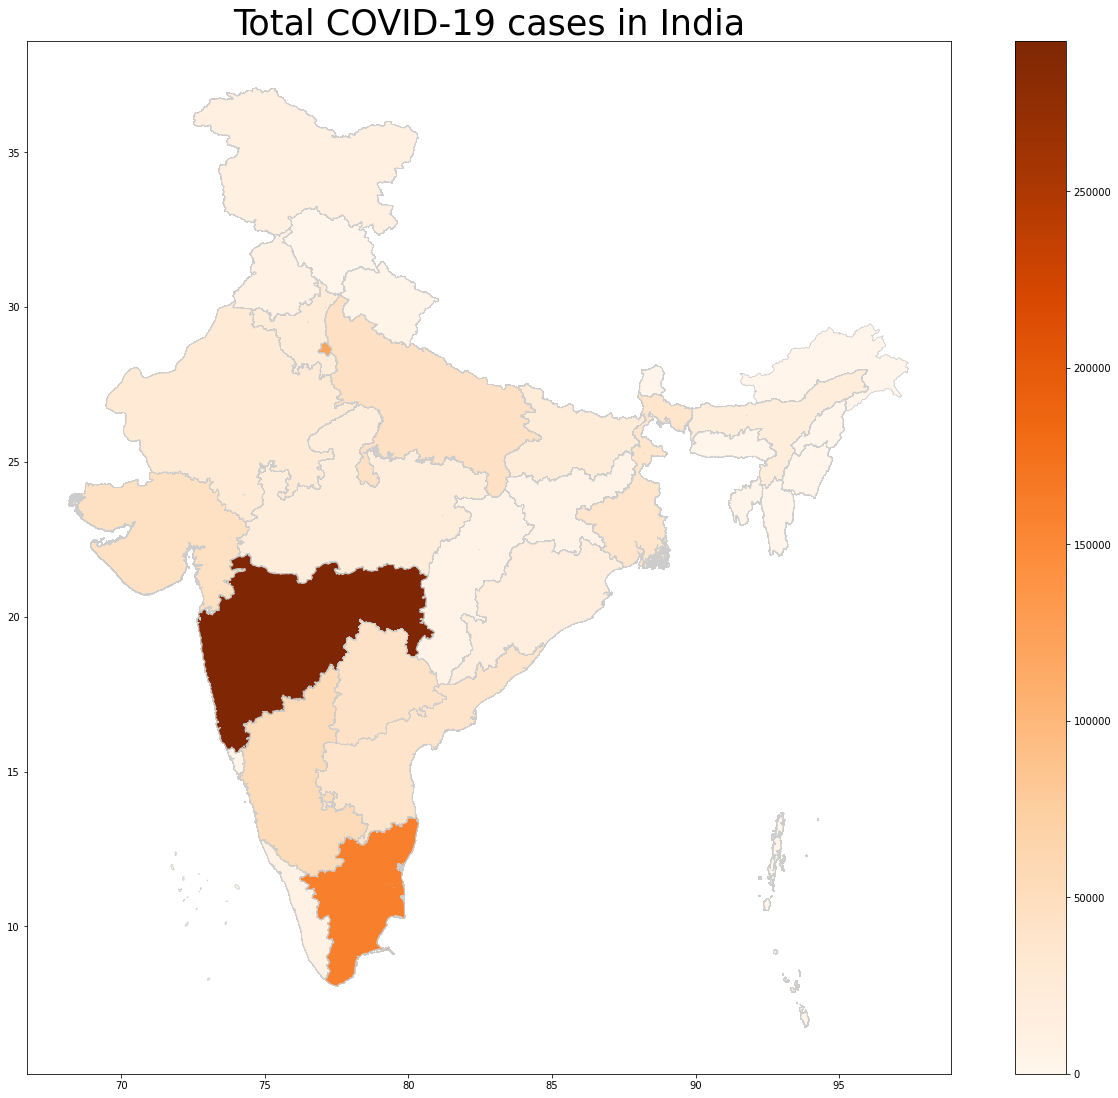

In [15]:
fig, ax = plt.subplots(1, figsize=(23, 19))
ax.axis('on')
ax.set_title('Total COVID-19 cases in India', fontdict={'fontsize': '35', 'fontweight' : '5'})

# plot the figure
merged.plot(column='Total Cases', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)



# Save the output as a PNG image
fig.savefig("TotalCase_India.png", dpi=100)

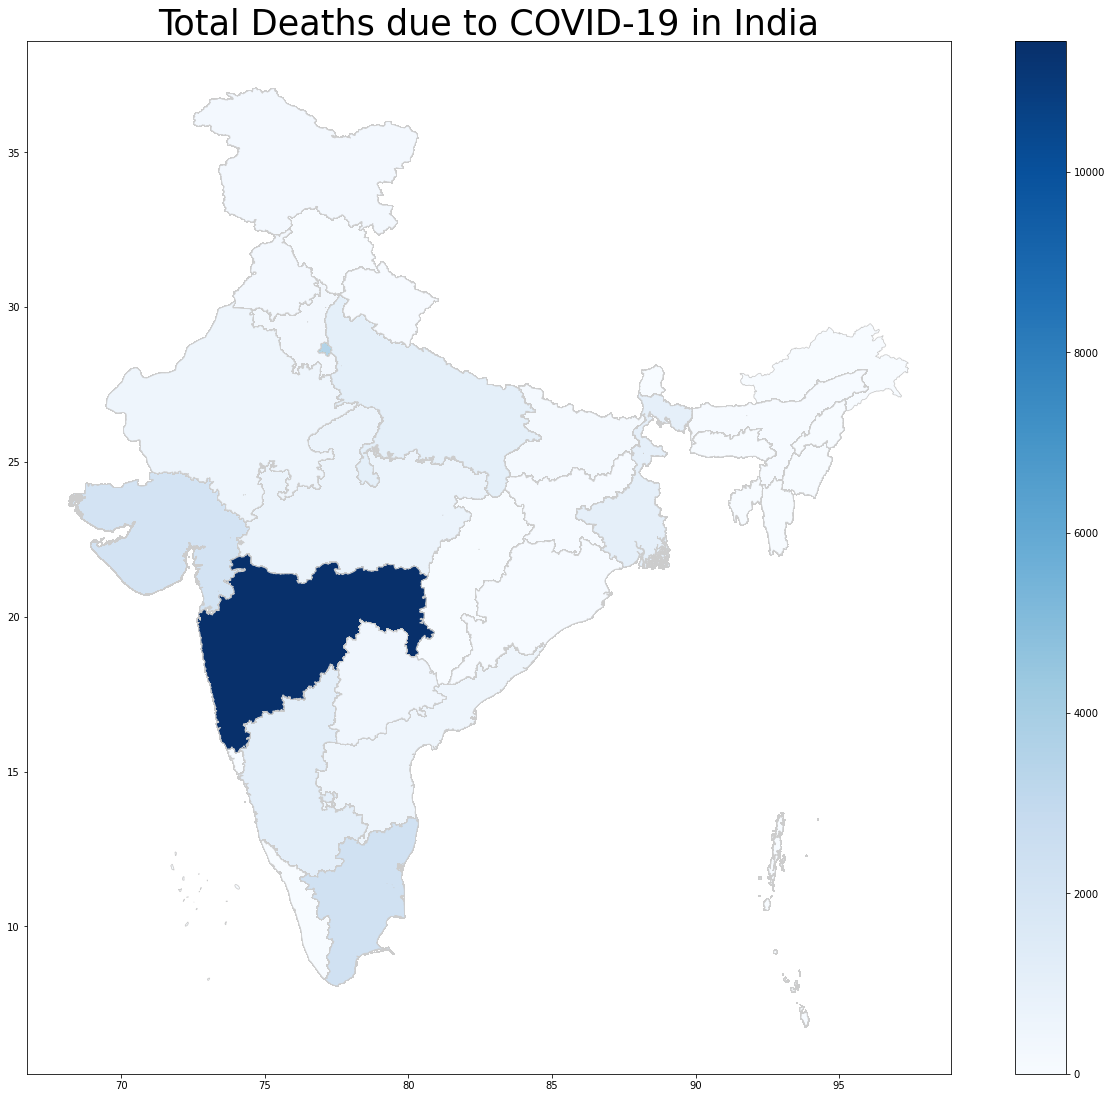

In [16]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(23, 19))
ax.axis('on')
ax.set_title('Total Deaths due to COVID-19 in India', fontdict={'fontsize': '35', 'fontweight' : '5'})

# plot the figure
merged.plot(column='Death', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


# Save the output as a PNG image
fig.savefig("TotalDeath_India.png", dpi=100)